<a href="https://colab.research.google.com/github/kartikde/Handwriting-detection/blob/main/Handwritten_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of dataset: (1797, 64)
Unique labels: [0 1 2 3 4 5 6 7 8 9]

✅ Model Accuracy: 0.9694444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


📤 Upload a digit image (28x28 or larger, white background, black digit)...


Saving download.png to download.png


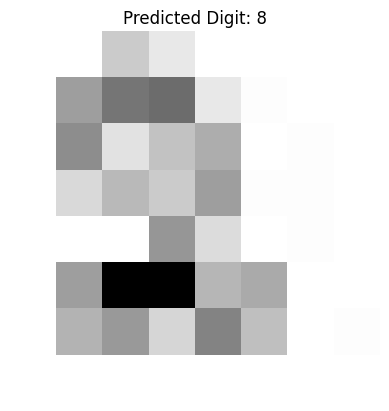

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageOps
import cv2
from google.colab import files
digits = load_digits()

X = digits.data
y = digits.target

print("Shape of dataset:", X.shape)
print("Unique labels:", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\n📤 Upload a digit image (28x28 or larger, white background, black digit)...")
uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(filename).convert('L')

    img_resized = img.resize((8,8), Image.LANCZOS)

    img_inverted = ImageOps.invert(img_resized)

    img_array = np.array(img_inverted)

    img_array = (img_array / 16).astype(np.float64)

    img_flattened = img_array.flatten().reshape(1, -1)

    prediction = rf.predict(img_flattened)

    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Predicted Digit: {prediction[0]}")
    plt.axis('off')
    plt.show()
